In [ ]:
!pip install category_encoders optuna
!pip install --upgrade catboost

## Введение

**Мне был поставлен важный заказ на создание системы, способной оценить риск дорожно-транспортных происшествий (ДТП) на основе выбранного маршрута движения**. Под риском понимается вероятность ДТП с любым уровнем повреждения транспортного средства. **Целью этого проекта является разработка системы**, которая будет активироваться, когда водитель забронирует автомобиль, сядет за руль и выберет маршрут, предоставляя предупреждения и рекомендации при высоком уровне риска.

Идея создания такой системы находится в стадии предварительного обсуждения, и на рынке пока не существует чёткого алгоритма работы или аналогичных решений. **Текущая задача состоит в исследовании возможности предсказания ДТП, опираясь на исторические данные одного из регионов**.

**Цели проекта**:

1. **Создание модели предсказания ДТП с фокусом на тип виновника "машина" (car) в таблице происшествий.**
2. **Выявление случаев, когда ДТП приводило к любым повреждениям транспортных средств, исключая тип SCRATCH (царапина).**
3. **Построение модели с использованием данных за 2012 год, обеспечивающих актуальность информации.**
4. **Учет фактора возраста автомобиля в модели, как важного параметра риска.**

**Ключевые вопросы исследования**:

1. **Возможно ли разработать адекватную систему оценки водительского риска при предоставлении автомобилей в аренду, основанную на предсказании вероятности ДТП?**
2. **Какие другие факторы следует учесть в модели, чтобы повысить точность прогнозов и понимание рисков?**
3. **Требуется ли оборудование автомобилей дополнительными датчиками или камерами для обеспечения дополнительной безопасности?**

Для успешной реализации проекта мне предоставлен доступ к базе данных происшествий, и моя задача – сформировать инновационную систему оценки риска ДТП, способствующую повышению безопасности на дорогах.

**Описание данных**:


<p style="font-size: 150%; text-align: center;font-weight: bold;"> ER - диаграмма </p> 

![](https://pictures.s3.yandex.net/resources/1.7_2880border_1_1654004672.png)

<details>

<summary style="font-size: 150%; text-align: center;font-weight: bold;"> Подробнее про Сollisions (нажмите сюда)</summary>
<h3><strong>Сollisions (информация о происшествиях)</strong></h3>
<table cellpadding="0" cellspacing="0"><thead><tr><th scope="col">Описание</th><th scope="col">Обозначение в таблице</th><th scope="col">Подробнее</th></tr></thead><tbody><tr><td>Идентификационный&nbsp; Номер в базе данных</td><td>CASE_ID</td><td>Уникальный номер для зарегистрированного происшествия в таблице происшествий.</td></tr><tr><td>Дата происшествия</td><td>COLLISION_DATE</td><td>Формат год/месяц/день</td></tr><tr><td>Время происшествия</td><td>COLLISION_TIME</td><td>Формат: 24-часовой</td></tr><tr><td>Является ли место происшествие  перекрёстком</td><td>INTERSECTION</td><td>Y — Intersection (перекрёсток)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>N — Not Intersection (не перекрёсток)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>-- — Not stated (Не указано)</td></tr><tr><td>Погода</td><td>WEATHER_1</td><td>A — Clear (Ясно)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>B — Cloudy (Облачно)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>C — Raining (Дождь)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>D — Snowing (Снегопад)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>E — Fog (Туман)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>F — Other (Другое)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>G — Wind (Ветер)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>- — Not Stated (Не указано)</td></tr><tr><td>Серьёзность происшествия</td><td>COLLISION_DAMAGE</td><td>1 — FATAL  ТС (Не подлежит восстановлению)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>2 — SEVERE DAMAGE (Серьёзный ремонт, большая часть под замену/Серьёзное повреждение капитального строения)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>3 — MIDDLE DAMAGE (Средний ремонт, машина в целом на ходу/Строение в целом устояло)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>4 — SMALL DAMAGE (Отдельный элемент кузова под замену/покраску)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>0 – SCRATCH (Царапина)</td></tr><tr><td>Основной фактор аварии</td><td>PRIMARY_COLL_FACTOR</td><td>A — Code Violation (Нарушение правил ПДД)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>B — Other Improper Driving (Другое неправильное вождение)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>C — Other Than Driver (Кроме водителя)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>D — Unknown (Неизвестно)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>E — Fell Asleep (Заснул)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>- — Not Stated (Не указано)</td></tr><tr><td>Состояние дороги</td><td>ROAD_SURFACE</td><td>A — Dry (Сухая)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>B — Wet (Мокрая)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>C — Snowy or Icy (Заснеженная или обледенелая)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>D — Slippery (Muddy, Oily, etc.) (Скользкая, грязная, маслянистая и т. д.)</td></tr><tr><td></td><td></td><td>- — Not Stated (Не указано)</td></tr><tr><td>Освещение</td><td>LIGHTING</td><td>A — Daylight (Дневной свет)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>B — Dusk-Dawn (Сумерки-Рассвет)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>C — Dark-Street Lights (Темно-Уличные фонари)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>D — Dark-No Street Lights (Темно-Нет уличных фонарей)</td></tr><tr><td></td><td></td><td>E — Dark-Street Lights Not Functioning (Темно-Уличные фонари не работают)</td></tr><tr><td></td><td></td><td>- — Not Stated (Не указано)</td></tr><tr><td>Номер географических районов, где произошло ДТП</td><td>COUNTY_CITY_LOCATION</td><td>число</td></tr><tr><td>Названия географических районов, где произошло ДТП</td><td>COUNTY_LOCATION</td><td>список разных названий, категориальный тип данных</td></tr><tr><td>Направление движения</td><td>DIRECTION</td><td>N — North (Север)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>E — East (Восток)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>S — South (Юг)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>W — West (Запад)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>- or blank — Not State (Не указано)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>на перекрёстке</td></tr><tr><td>Расстояние от главной дороги (метры)</td><td>DISTANCE</td><td>число</td></tr><tr><td>Тип дороги</td><td>LOCATION_TYPE</td><td>H — Highway (Шоссе)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>I — Intersection (Перекрёсток)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>R — Ramp (or Collector) (Рампа)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>- or blank — Not State Highway (Не указано)</td></tr><tr><td>Количество участников</td><td>PARTY_COUNT</td><td>число</td></tr><tr><td>Категория нарушения</td><td>PCF_VIOLATION_CATEGORY</td><td>01 — Driving or Bicycling Under the Influence of Alcohol or Drug (Вождение или езда на велосипеде в состоянии алкогольного или наркотического опьянения)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>02 — Impeding Traffic (Препятствие движению транспорта)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>03 — Unsafe Speed (Превышение скорости)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>04 — Following Too Closely (Опасное сближение)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>05 — Wrong Side of Road (Неправильная сторона дороги)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>06 — Improper Passing (Неправильное движение)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>07 — Unsafe Lane Change (Небезопасная смена полосы движения)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>08 — Improper Turning (Неправильный поворот)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>09 — Automobile Right of Way (Автомобильное право проезда)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>10 — Pedestrian Right of Way (Пешеходное право проезда)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>11 — Pedestrian Violation (Нарушение пешеходами)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>12 — Traffic Signals and Signs (Дорожные сигналы и знаки)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>13 — Hazardous Parking (Неправильная парковка)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>14 — Lights (Освещение)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>15 — Brakes (Тормоза)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>16 — Other Equipment (Другое оборудование)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>17 — Other Hazardous Violation (Другие нарушения)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>18 — Other Than Driver (or Pedestrian) (Кроме водителя или пешехода)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>19 —  Speeding (Скорость)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>20 — Pedestrian dui (Нарушение пешехода)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>21 — Unsafe Starting or Backing (Опасный старт)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>22 — Other Improper Driving (Другое неправильное вождение)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>23 — Pedestrian or “Other” Under the Influence of Alcohol or Drug (Пешеход или «Другой» в состоянии алкогольного или наркотического опьянения)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>24 — Fell Asleep (Заснул)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>00 — Unknown (Неизвестно)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>- — Not Stated (Не указано)</td></tr><tr><td>Тип аварии</td><td>TYPE_OF_COLLISION</td><td>A — Head-On (Лоб в лоб)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>B — Sideswipe (Сторона)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>C — Rear End (Столкновение задней частью)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>D — Broadside (Боковой удар)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>E — Hit Object (Удар объекта)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>F — Overturned (Опрокинутый)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>G — Vehicle (транспортное средство/ Пешеход)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>H — Other (Другое)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>- — Not Stated (Не указано)</td></tr><tr><td>Дополнительные участники ДТП</td><td>MOTOR_VEHICLE_INVOLVED_WITH</td><td>Other motor vehicle (Другой автомобиль)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>Fixed object (Неподвижный объект)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>Parked motor vehicle (Припаркованный автомобиль)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>Pedestrian (Пешеход)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>Bicycle (Велосипедист)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>Non-collision (Не столкновение)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>Other object (Другой объект)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>Motor vehicle on other roadway (Автомобиль на другой проезжей)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>Animal (Животное)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>Train (Поезд)</td></tr><tr><td>Дорожное состояние</td><td>ROAD_CONDITION_1</td><td>A — Holes, Deep Ruts (Ямы, глубокая колея)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>B — Loose Material on Roadway (Сыпучий материал на проезжей части)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>C — Obstruction on Roadway (Препятствие на проезжей части)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>D — Construction or Repair Zone (Зона строительства или ремонта)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>E — Reduced Roadway Width (Уменьшенная ширина проезжей части)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>F — Flooded (Затоплено)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>G — Other (Другое)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>H — No Unusual Condition (Нет ничего необычного)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>- — Not Stated (Не указано)</td></tr><tr><td>Устройство управления</td><td>CONTROL_CONDITION_1</td><td>A — Functioning (Функционирует)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>B — Not Functioning (Не функционирует)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>C — Obscured (Затемнённый)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>D — None (Нет)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>- — Not Stated (Не указано)</td></tr></tbody></table>
</details>

<br>

<details>

<summary style="font-size: 150%; text-align: center;font-weight: bold;">Подробнее про Parties (нажмите сюда)</summary>
<h3><strong>Parties (описание участников происшествия)</strong></h3><table cellpadding="0" cellspacing="0"><thead><tr><th scope="col">Описание</th><th scope="col">Обозначение в таблице</th><th scope="col">Подробнее</th></tr></thead><tbody><tr><td>Идентификационный&nbsp; номер в базе данных</td><td>CASE_ID</td><td>Уникальный номер для зарегистрированного происшествия в таблице происшествий.</td></tr><tr><td>Номер участника происшествия</td><td>PARTY_NUMBER</td><td>От 1 до N — по числу участников происшествия</td></tr><tr><td>Тип участника происшествия</td><td>PARTY_TYPE</td><td>1 — Car (Авто)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>2 — Road bumper (Дорожные знаки)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>3 — Building (Строения)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>4 — Road signs (Отбойник)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>5 — Other (Другое)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>6 — Operator (Оператор)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>- — Not Stated (Не указано)</td></tr><tr><td>Виновность участника</td><td>AT_FAULT</td><td>0/1</td></tr><tr><td>Сумма страховки (тыс. $)</td><td>INSURANCE_PREMIUM</td><td>число</td></tr><tr><td>Состояние участника: физическое или с учётом принятых лекарств</td><td>PARTY_DRUG_PHYSICAL</td><td>E — Under Drug Influence (Под воздействием лекарств)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>F — Impairment — Physical (Ухудшение состояния)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>G — Impairment Unknown (Не известно)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>H — Not Applicable (Не оценивался)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>I — Sleepy/Fatigued (Сонный/Усталый)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>- — Not Stated (Не указано)</td></tr><tr><td>Трезвость участника</td><td>PARTY_SOBRIETY</td><td>A — Had Not Been Drinking (Не пил)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>B — Had Been Drinking, Under Influence (Был пьян, под влиянием)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>C — Had Been Drinking, Not Under Influence (Был пьян, не под влиянием)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>D — Had Been Drinking, Impairment Unknown (Был пьян, ухудшение неизвестно)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>G — Impairment Unknown (Неизвестно ухудшение)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>H — Not Applicable (Не оценивался)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>- — Not Stated (Не указано)</td></tr><tr><td>Наличие телефона в автомобиле (возможности разговаривать по громкой связи)</td><td>CELLPHONE_IN_USE</td><td>0/1</td></tr><tr><td></td><td></td><td></td></tr></tbody></table>
</details>

<br>


<details>

<summary style="font-size: 150%; text-align: center;font-weight: bold;">Подробнее про Vehicles (нажмите сюда)</summary>
<h3>Vehicles <strong>(Описание автомобиля)</strong></h3><table cellpadding="0" cellspacing="0"><thead><tr><th scope="col">Описание</th><th scope="col">Обозначение в таблице</th><th scope="col">Подробнее</th></tr></thead><tbody><tr><td>Индекс текущей таблицы</td><td>ID</td><td>Номер в таблице</td></tr><tr><td>Идентификационный&nbsp;номер в базе данных</td><td>CASE_ID</td><td>Уникальный номер для зарегистрированного происшествия в таблице происшествий.</td></tr><tr><td>Тип кузова</td><td>VEHICLE_TYPE</td><td>MINIVAN</td></tr><tr><td></td></tr><tr><td></td><td></td><td>COUPE</td></tr><tr><td></td></tr><tr><td></td><td></td><td>SEDAN</td></tr><tr><td></td></tr><tr><td></td><td></td><td>HATCHBACK</td></tr><tr><td></td></tr><tr><td></td><td></td><td>OTHER</td></tr><tr><td>Тип КПП</td><td>VEHICLE_TRANSMISSION</td><td>auto (Автоматическая)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>manual (Ручная)</td></tr><tr><td></td></tr><tr><td></td><td></td><td>- — Not Stated (Не указано)</td></tr><tr><td>Возраст автомобиля (в годах)</td><td>VEHICLE_AGE</td><td>число</td></tr></tbody></table><div></div>
</details>

<br>

In [2]:
import warnings
import random

import pandas as pd
import numpy as np
import optuna

import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import lightgbm as lgb

from sqlalchemy import create_engine 

from sklearn.metrics import precision_score, confusion_matrix, recall_score, accuracy_score, roc_auc_score, f1_score

from lightgbm import LGBMClassifier
from catboost import CatBoostRegressor, CatBoostClassifier

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from category_encoders.cat_boost import CatBoostEncoder

warnings.filterwarnings("ignore")
seed = 1234
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
random.seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

## Подключитесь к базе. Загрузите таблицы sql

In [3]:
db_config = {
'user': 'praktikum_student', # имя пользователя,
'pwd': 'Sdf4$2;d-d30pp', # пароль,
'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
'port': 6432, # порт подключения,
'db': 'data-science-vehicle-db' # название базы данных,
} 

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
    db_config['user'],
    db_config['pwd'],
    db_config['host'],
    db_config['port'],
    db_config['db'],
)

In [4]:
engine = create_engine(connection_string) 

## Проведите первичное исследование таблиц

In [5]:
query =  '''
    SELECT * 
    FROM case_ids
    LIMIT 10
 '''

pd.read_sql_query(query, con=engine)

,case_id,db_year
0,0081715,2021
1,0726202,2021
2,3858022,2021
3,3899441,2021
4,3899442,2021
5,3899445,2021
6,3899446,2021
7,3899449,2021
8,3899450,2021
9,3899453,2021


In [6]:
query =  '''
    SELECT * 
    FROM collisions
    LIMIT 10
 '''

pd.read_sql_query(query, con=engine)

,case_id,county_city_location,county_location,distance,direction,intersection,weather_1,location_type,collision_damage,party_count,primary_collision_factor,pcf_violation_category,type_of_collision,motor_vehicle_involved_with,road_surface,road_condition_1,lighting,control_device,collision_date,collision_time
0,4083072,1942,los angeles,528.0,north,0,cloudy,highway,small damage,2,vehicle code violation,unsafe lane change,sideswipe,other motor vehicle,wet,normal,daylight,none,2009-01-22,07:25:00
1,4083075,4313,santa clara,0.0,None,1,clear,None,small damage,1,vehicle code violation,improper passing,hit object,fixed object,dry,normal,dark with street lights,functioning,2009-01-03,02:26:00
2,4083073,0109,alameda,0.0,None,1,clear,None,scratch,2,vehicle code violation,improper turning,broadside,other motor vehicle,dry,normal,dark with street lights,functioning,2009-01-11,03:32:00
3,4083077,0109,alameda,0.0,None,1,clear,None,scratch,2,vehicle code violation,automobile right of way,broadside,other motor vehicle,dry,normal,daylight,functioning,2009-01-11,10:35:00
4,4083087,4313,santa clara,0.0,None,1,clear,None,scratch,2,vehicle code violation,speeding,rear end,other motor vehicle,dry,None,dark with street lights,functioning,2009-01-02,22:43:00
5,4083097,0109,alameda,0.0,None,1,clear,ramp,small damage,2,vehicle code violation,speeding,rear end,other motor vehicle,dry,normal,dark with street lights,functioning,2009-01-18,02:18:00
6,4083092,1942,los angeles,1320.0,south,0,clear,highway,scratch,2,vehicle code violation,unsafe lane change,rear end,other motor vehicle,dry,normal,daylight,none,2009-01-21,10:30:00
7,4083096,1942,los angeles,200.0,south,0,clear,highway,scratch,3,vehicle code violation,speeding,rear end,other motor vehicle,dry,normal,daylight,none,2009-01-21,08:55:00
8,4083100,1942,los angeles,2112.0,north,0,cloudy,highway,scratch,2,vehicle code violation,speeding,rear end,other motor vehicle,dry,normal,daylight,none,2009-01-21,16:20:00
9,4083103,4313,santa clara,0.0,None,1,cloudy,None,scratch,2,vehicle code violation,None,broadside,other motor vehicle,wet,normal,dusk or dawn,functioning,2009-01-02,15:55:00


In [7]:
query =  '''
    SELECT * 
    FROM parties
    LIMIT 10
 '''

pd.read_sql_query(query, con=engine)

,id,case_id,party_number,party_type,at_fault,insurance_premium,party_sobriety,party_drug_physical,cellphone_in_use
0,22,3899454,1,road signs,1,29.0,had not been drinking,None,0.0
1,23,3899454,2,road signs,0,7.0,had not been drinking,None,0.0
2,29,3899462,2,car,0,21.0,had not been drinking,None,0.0
3,31,3899465,2,road signs,0,24.0,had not been drinking,None,0.0
4,41,3899478,2,road bumper,0,NaN,not applicable,not applicable,0.0
5,43,3899481,2,road bumper,0,NaN,not applicable,not applicable,0.0
6,72,3899505,2,road bumper,0,NaN,not applicable,not applicable,0.0
7,73,3899505,3,road bumper,0,NaN,not applicable,not applicable,0.0
8,76,3899509,1,road bumper,0,NaN,had not been drinking,None,0.0
9,93,3981292,2,road bumper,0,NaN,had not been drinking,None,NaN


In [8]:
query =  '''
    SELECT * 
    FROM vehicles
    LIMIT 10
 '''

pd.read_sql_query(query, con=engine) 

,id,case_id,party_number,vehicle_type,vehicle_transmission,vehicle_age
0,1175713,5305032,2,sedan,manual,3
1,1,3858022,1,sedan,auto,3
2,1175712,5305030,1,sedan,auto,3
3,1175717,5305033,3,sedan,auto,5
4,1175722,5305034,2,sedan,auto,5
5,1175737,5305046,2,sedan,auto,5
6,1175750,5305053,3,sedan,auto,9
7,1175715,5305033,1,sedan,manual,10
8,1175716,5305033,2,sedan,manual,4
9,1175758,5305060,2,sedan,auto,11


<br>

Ошибок в таблицах не обнаружено, но возможно они проявят себя в будущем. Общий ключ "case_id" присутствует во всех таблицах.

**Незначительное замечание**: Таблица "case_ids" частично не соответствует ER-диаграмме.

<br>

##  Проведите статистический анализ факторов ДТП

### Месяцы и аварии

In [9]:
query =  '''
    SELECT EXTRACT('YEAR' FROM COLLISION_DATE) as year,
                   EXTRACT('MONTH' FROM COLLISION_DATE) as month, 
                   COUNT(*) as cnt
    FROM collisions as c
    GROUP BY EXTRACT('YEAR' FROM COLLISION_DATE),
                       EXTRACT('MONTH' FROM COLLISION_DATE)
 '''
temp = pd.read_sql_query(query, con=engine)

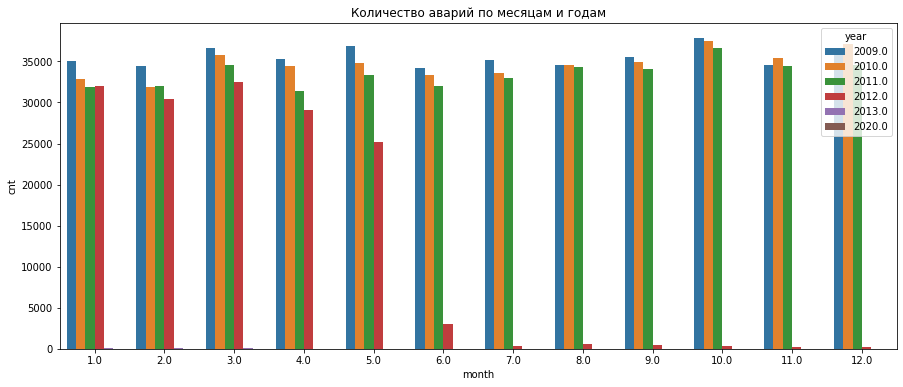

In [10]:
plt.figure(figsize = (15, 6))
sns.barplot(data=temp, x="month", y="cnt", hue="year")
plt.title('Количество аварий по месяцам и годам')
plt.show()

<br>

Как видно на графике, данные за **вторую половину 2012 года и последующие годы неполные**. Для объективной оценки **не следует учитывать неполные года** при оценке временных показателей.

<br>

In [11]:
query =  '''
    SELECT EXTRACT('YEAR' FROM COLLISION_DATE) as year,
                   EXTRACT('MONTH' FROM COLLISION_DATE) as month, 
                   COUNT(*) as cnt
    FROM collisions as c
    WHERE EXTRACT('YEAR' FROM COLLISION_DATE) <= 2011
    GROUP BY EXTRACT('YEAR' FROM COLLISION_DATE),
                       EXTRACT('MONTH' FROM COLLISION_DATE)
 '''
temp_1 = pd.read_sql_query(query, con=engine)

query =  '''
    SELECT EXTRACT('MONTH' FROM COLLISION_DATE) as month, 
                   COLLISION_DAMAGE as damage,
                   COUNT(*) as cnt
    FROM collisions as c
    WHERE EXTRACT('YEAR' FROM COLLISION_DATE) <= 2011
    GROUP BY EXTRACT('MONTH' FROM COLLISION_DATE),
                       COLLISION_DAMAGE
 '''
temp_2 = pd.read_sql_query(query, con=engine)

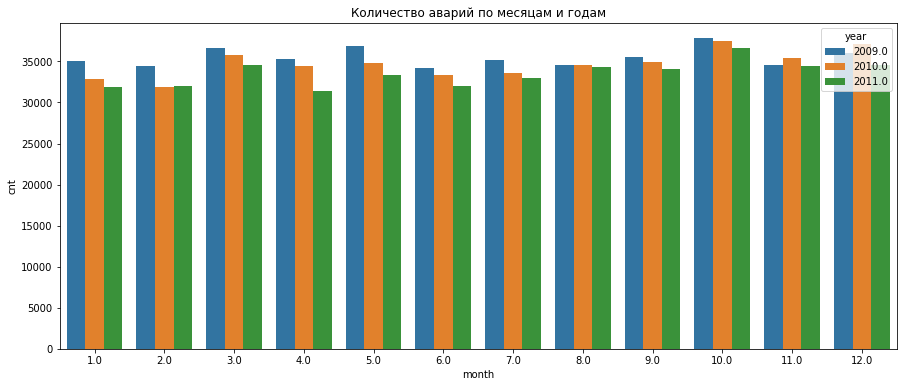

In [12]:
plt.figure(figsize = (15, 6))
sns.barplot(data=temp_1, x="month", y="cnt", hue="year")
plt.title('Количество аварий по месяцам и годам')
plt.show()

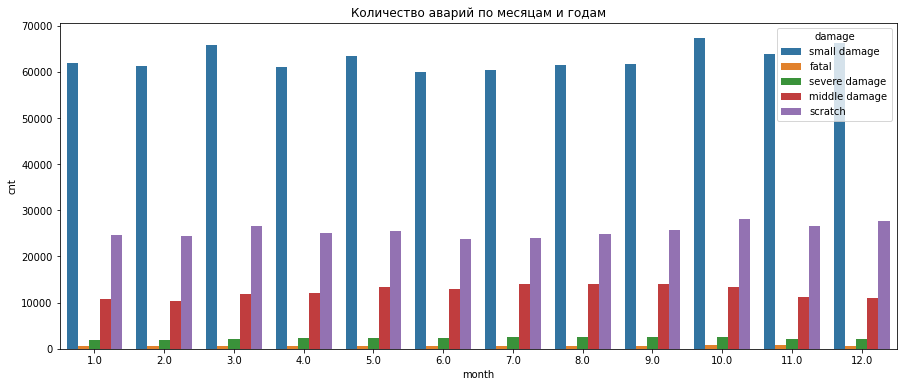

In [13]:
plt.figure(figsize = (15, 6))
sns.barplot(data=temp_2, x="month", y="cnt", hue = 'damage')
plt.title('Количество аварий по месяцам и годам')
plt.show()

<br>

**Вывод:**  Особой зависимости количества происшествий **по месяцам не наблюдается**. Однако заметна тенденция **снижения количества аварий** по годам. Тем не менее, судить об этом невозможно, поскольку неизвестно общее количество арендованных машин по годам и месяцам.

<br>

In [14]:
del temp, temp_1, temp_2

### Задачи

- Проведите анализ серьёзности повреждений транспортного средства, учитывая трезвость участника в момент ДТП (связать collisions и parties).
- Проведите анализ серьёзности повреждений транспортного средства, учитывая состояние участника: физическое или с учётом принятых лекарств в момент ДТП (связать collisions и parties).
- Проведите анализ серьёзности повреждений транспортного средства, учитывая возраст автомобиля в момент ДТП (связать collisions и vehicles).
- Найдите наиболее опасные встречающиеся комбинации состояния дороги (мокрая, сухая и т.д.), освещения и дорожного состояния (ямы и т.д.) при ДТП (таблица parties).
- Определить взаимосвязь между типом кузова средства и тяжестью повреждений при ДТП (связать vehicles и collisions).
- Анализировать влияние погодных условий на степень повреждений (таблица collisions).

**Проведите анализ серьёзности повреждений транспортного средства, учитывая трезвость участника в момент ДТП (связать collisions и parties).**

**1. Написать SQL запрос**

``` python
query =  '''
    WITH cnt AS (SELECT part.PARTY_SOBRIETY, 
                                          COUNT(*) as cont
                            FROM collisions as coli
                            LEFT JOIN parties as part ON part.case_id = coli.case_id
                            GROUP BY part.PARTY_SOBRIETY)
    
    SELECT part.PARTY_SOBRIETY, 
                   coli.COLLISION_DAMAGE,
                   COUNT(*)::numeric / MAX(cnt.cont)::numeric as coef
    FROM collisions as coli
    LEFT JOIN parties as part ON part.case_id = coli.case_id
    LEFT JOIN cnt ON cnt.PARTY_SOBRIETY = part.PARTY_SOBRIETY
    GROUP BY part.PARTY_SOBRIETY,
                       coli.COLLISION_DAMAGE
    ORDER BY party_sobriety, collision_damage
 '''
temp = pd.read_sql_query(query, con=engine)
```

<br>


**2. Сделать график для наглядности**

``` python
plt.figure(figsize = (23, 5))
sns.barplot(data = temp, x = 'party_sobriety', y = 'coef', hue = 'collision_damage')
plt.title('Серьёзности повреждений при трезвость участника')
plt.show()
```

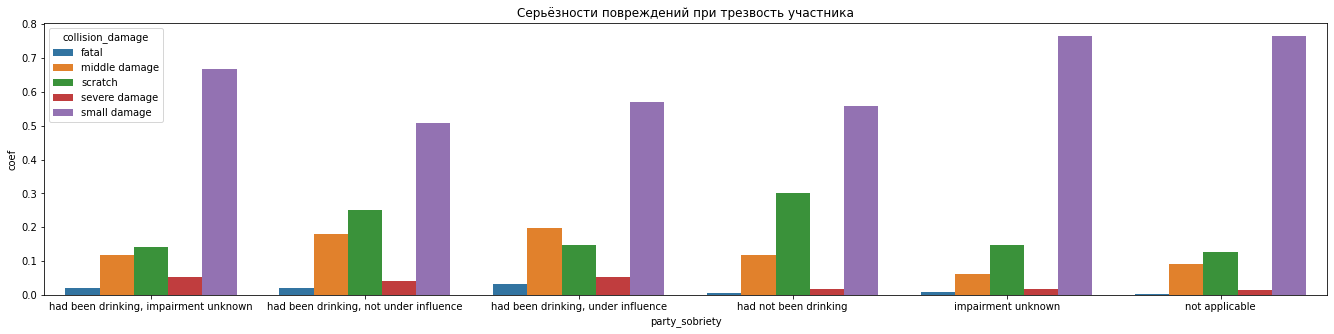

<br>

**3. Написать вывод**
- Под воздействием чего-либо количество средних, тяжелых и фатальных повреждений больше, чем при трезвом вождении.
- При трезвом вождении больше мелких повреждений.

**Определить взаимосвязь между типом кузова средства и тяжестью повреждений при ДТП (связать vehicles и collisions).**

**1. Написать SQL запрос**

``` python
query =  '''
    WITH cnt AS (SELECT veh.VEHICLE_TYPE, 
                                          COUNT(*) as cont
                            FROM vehicles as veh
                            JOIN parties as par ON veh.case_id = par.case_id AND veh.party_number = par.party_number
                            LEFT JOIN collisions as coli ON veh.case_id = coli.case_id
                            GROUP BY veh.VEHICLE_TYPE)

    SELECT veh.VEHICLE_TYPE, 
                   coli.COLLISION_DAMAGE,
                   COUNT(*)::numeric / MAX(cnt.cont)::numeric as coef
    FROM vehicles as veh
    JOIN parties as par ON veh.case_id = par.case_id AND veh.party_number = par.party_number
    LEFT JOIN collisions as coli ON veh.case_id = coli.case_id
    LEFT JOIN cnt ON cnt.VEHICLE_TYPE = veh.VEHICLE_TYPE
    GROUP BY veh.VEHICLE_TYPE,
                       coli.COLLISION_DAMAGE
    ORDER BY VEHICLE_TYPE, COLLISION_DAMAGE
 '''

temp = pd.read_sql_query(query, con=engine)
```

<br>


**2. Сделать график для наглядности**

``` python
plt.figure(figsize = (23, 5))
sns.barplot(data = temp, x = 'vehicle_type', y = 'coef', hue = 'collision_damage')
plt.title('Серьёзности повреждений при трезвость участника')
plt.show()
```

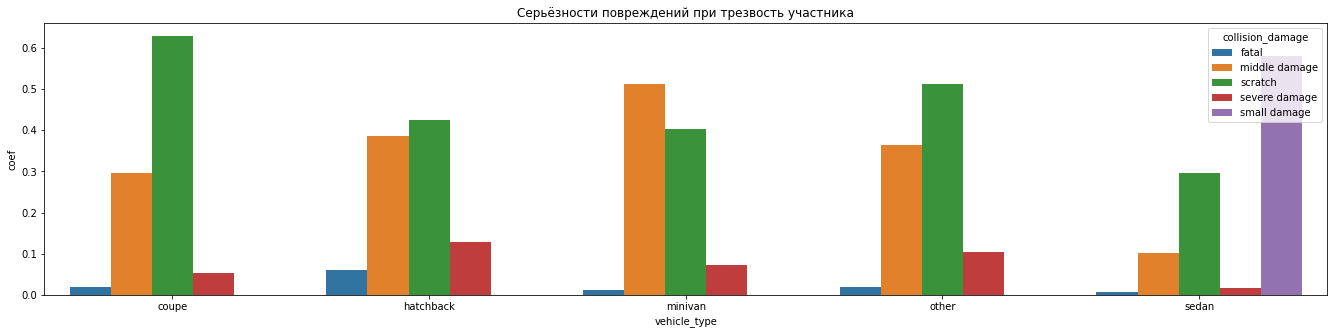

<br>


**3. Написать вывод**
- Данных о незначительных повреждениях не представлено для всех типов кузовов, кроме седана, что является ошибкой данных.
- Кузов "седан" демонстрируют наименьший коэффициент для всех уровней повреждений, что делает их наиболее безопасными среди представленных типов.
- Наиболее подвержены царапинам машины с кузовом "купе".
- "Хэтчбэки" наиболее склонны к фатальным повреждениям.

## Создайте модель для оценки водительского риска

### Предобработка

In [15]:
query =  '''
    SELECT *
    FROM vehicles as veh
    JOIN parties as par ON veh.case_id = par.case_id AND veh.party_number = par.party_number
    LEFT JOIN collisions as col ON veh.case_id = col.case_id
    WHERE col.collision_damage != 'scratch' AND
                  DATE_TRUNC('YEAR', col.collision_date) = '2012-01-01' AND
                  par.party_type = 'car'    
 '''

df = pd.read_sql_query(query, con=engine)
df.head()

,id,case_id,party_number,vehicle_type,vehicle_transmission,vehicle_age,id,case_id,party_number,party_type,...,primary_collision_factor,pcf_violation_category,type_of_collision,motor_vehicle_involved_with,road_surface,road_condition_1,lighting,control_device,collision_date,collision_time
0,1320375,5448917,1,sedan,manual,0.0,2395544,5448917,1,car,...,vehicle code violation,speeding,rear end,other motor vehicle,dry,normal,daylight,none,2012-01-16,15:45:00
1,1274777,5403037,1,sedan,manual,3.0,2312523,5403037,1,car,...,vehicle code violation,dui,hit object,fixed object,dry,loose material,dark with street lights,functioning,2012-01-13,02:55:00
2,1275580,5403431,1,coupe,manual,6.0,2313227,5403431,1,car,...,vehicle code violation,dui,hit object,fixed object,dry,normal,dark with street lights,none,2012-01-11,18:03:00
3,1336237,5464780,1,sedan,manual,4.0,2424883,5464780,1,car,...,vehicle code violation,speeding,rear end,other motor vehicle,dry,normal,dark with street lights,none,2012-01-12,17:35:00
4,1359213,5487099,2,sedan,manual,4.0,2466513,5487099,2,car,...,vehicle code violation,unsafe starting or backing,sideswipe,other motor vehicle,dry,normal,dark with street lights,none,2012-01-16,19:10:00


In [16]:
columms = ['at_fault', # trarget
                   'collision_date', #для определения времени года
                   'collision_time', #для определения времени суток
                   'cellphone_in_use', # возомжность разговаривать по громкой связи (отвлекающий фактор при езде)
                   'motor_vehicle_involved_with', # Например (Fixed object) прямое докозательство вины водителя
                   'party_drug_physical', # Прямое влияние на вииновность
                   'party_sobriety', #  Прямое влияние на вииновность
                   'primary_collision_factor', # Например (Fell Asleep) прямое докозательсво виновнсости 
                   'road_condition_1', # Может снижать сцепление колес
                   'road_surface', # Может снижать сцепление колес
                   'type_of_collision', # Например  (Rear End (Столкновение задней частью)) в большинстве случаев не вина водителя
                   'vehicle_age', # Старый автомобиль может быть менее надеждым
                   'weather_1' # Может снижать сцепление колес
                   ]

df = df[columms]
df.head()

,at_fault,collision_date,collision_time,cellphone_in_use,motor_vehicle_involved_with,party_drug_physical,party_sobriety,primary_collision_factor,road_condition_1,road_surface,type_of_collision,vehicle_age,weather_1
0,1,2012-01-16,15:45:00,0.0,other motor vehicle,None,had not been drinking,vehicle code violation,normal,dry,rear end,0.0,clear
1,1,2012-01-13,02:55:00,0.0,fixed object,under drug influence,"had been drinking, under influence",vehicle code violation,loose material,dry,hit object,3.0,clear
2,1,2012-01-11,18:03:00,NaN,fixed object,None,"had been drinking, under influence",vehicle code violation,normal,dry,hit object,6.0,clear
3,1,2012-01-12,17:35:00,0.0,other motor vehicle,None,had not been drinking,vehicle code violation,normal,dry,rear end,4.0,clear
4,0,2012-01-16,19:10:00,0.0,other motor vehicle,None,had not been drinking,vehicle code violation,normal,dry,sideswipe,4.0,clear


<br>

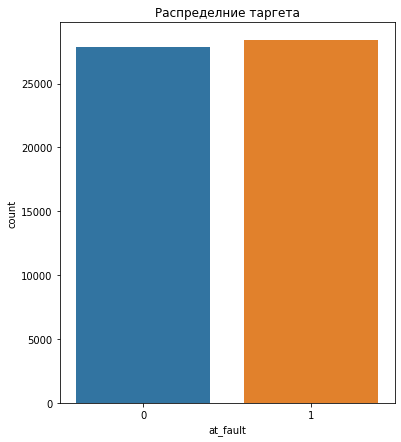

In [17]:
plt.figure(figsize = (6, 7))
plt.title('Распределние таргета')
sns.barplot(data = df['at_fault'].value_counts().to_frame().reset_index(), x = 'index', y = 'at_fault')
plt.xlabel('at_fault')
plt.ylabel('count')
plt.show()

**Классы сблансированы.**

<br>

In [18]:
none_coef = df.isna().sum() / len(df)
none_coef[none_coef > 0]

collision_time                 0.001565
cellphone_in_use               0.079487
motor_vehicle_involved_with    0.002880
party_drug_physical            0.949207
party_sobriety                 0.015503
primary_collision_factor       0.001973
road_condition_1               0.004427
road_surface                   0.006187
type_of_collision              0.005476
vehicle_age                    0.030117
weather_1                      0.002987
dtype: float64

- **collision_time** - не возможно заменить значение, строки с пропусокм
- **cellphone_in_use** - заемна при помощи использование предсказательных моделей
- **motor_vehicle_involved_with** - количетсво пропусков минимальное, удаление не приведет к ухудшению обобщаюшей способности моделей
- **party_drug_physical** - заменим пропуски на "Not Stated"
- **party_sobriety** - заменим пропуски на "Not Stated"
- **primary_collision_factor** - заменим пропуски на "Not Stated"
- **road_condition_1** - заменим пропуски на "Not Stated"
- **road_surface** - заменим пропуски на "Not Stated"
- **type_of_collision** - заменим пропуски на "Not Stated"
- **vehicle_age** - заемна при помощи использование предсказательных моделей
- **weather_1** - заменим пропуски на "Not Stated"

In [19]:
na_drop_col = ['collision_time', 'motor_vehicle_involved_with',]
df = df.dropna(subset = na_drop_col)

fillna_col = ['party_drug_physical', 'party_sobriety',
                   'primary_collision_factor',  'road_condition_1', 
                    'road_surface', 'type_of_collision', 
                    'weather_1']

df.loc[:, fillna_col] = df[fillna_col].fillna('Not Stated')

<br>

**Создадим дополнительные признаки из даты и времени аварии**

<br>

In [20]:
df['collision_date'] = pd.to_datetime(df['collision_date'])
df['collision_time'] = pd.to_timedelta(df['collision_time'].astype(str))
df['collision_datetime'] = df['collision_date'] + df['collision_time'] 


df['season'] = df['collision_datetime'].dt.month.apply(lambda x: 'Winter' if 1 <= x <= 2 else
                                                        'Spring' if 3 <= x <= 5 else
                                                        'Summer' if 6 <= x <= 8 else
                                                        'Autumn' if 9 <= x <= 11 else 'Winter')

df['hour'] = df['collision_datetime'].dt.hour
df['time_of_day'] = df['hour'].apply(lambda x: 'Night' if 0 <= x <= 5 else
                                             'Morning' if 6 <= x <= 11 else
                                             'Afternoon' if 12 <= x <= 17 else 'Evening')

In [21]:
df = df.drop(['collision_date', 'collision_time', 'hour', 'collision_datetime'], axis = 1)

<br>

**Заполним пропуски**

Будем считать что возможность проставлять пропуски будет отсутсвовать, в признаках vehicle_age и cellphone_in_use.

<br>

In [22]:
categ_columns = df.select_dtypes('object').columns.tolist()

with_none = df[df['vehicle_age'].isna()].reset_index(drop=True)
y_with_none = with_none['vehicle_age']
X_with_none = with_none.drop('vehicle_age', axis = 1)

without_none = df[~df['vehicle_age'].isna()].reset_index(drop=True)
y_without_none = without_none['vehicle_age']
X_without_none = without_none.drop('vehicle_age', axis = 1)

imputer_age = CatBoostRegressor(random_seed=1234)
imputer_age.fit(X_without_none, y_without_none, cat_features = categ_columns, verbose = False)

with_none.loc[:, 'vehicle_age'] = np.round(imputer_age.predict(X_with_none))

df = pd.concat([with_none, without_none]).reset_index(drop=True)

In [23]:
del with_none, without_none, X_without_none, y_without_none, X_with_none, y_with_none, imputer_age

In [24]:
categ_columns = df.select_dtypes('object').columns.tolist()

with_none = df[df['cellphone_in_use'].isna()].reset_index(drop=True)
y_with_none = with_none['cellphone_in_use']
X_with_none = with_none.drop('cellphone_in_use', axis = 1)

without_none = df[~df['cellphone_in_use'].isna()].reset_index(drop=True)
y_without_none = without_none['cellphone_in_use']
X_without_none = without_none.drop('cellphone_in_use', axis = 1)

imputer_age = CatBoostClassifier(random_seed=1234)
imputer_age.fit(X_without_none, y_without_none, cat_features = categ_columns, verbose = False)

with_none.loc[:, 'cellphone_in_use'] = np.round(imputer_age.predict(X_with_none))

df = pd.concat([with_none, without_none]).reset_index(drop=True)

In [25]:
del with_none, without_none, X_without_none, y_without_none, X_with_none, y_with_none, imputer_age

<br>

In [26]:
train, test = train_test_split(df, random_state = 1234, test_size = 0.30)

X_train = train.drop('at_fault', axis = 1)
y_train = train['at_fault']
X_test = test.drop('at_fault', axis = 1)
y_test = test['at_fault']

In [27]:
encoder = CatBoostEncoder(return_df = True, verbose = 0)
encoder.fit(X_train, y_train)
X_test = encoder.transform(X_test)
X_train = encoder.transform(X_train)

In [28]:
scaler = MinMaxScaler()
X_train = pd.DataFrame((scaler.fit_transform(X = X_train)), columns = X_train.columns)
X_test = pd.DataFrame((scaler.transform(X = X_test)), columns = X_test.columns)

In [29]:
X_test, X_eval, y_test, y_eval = train_test_split(X_test, y_test, random_state = 1234, test_size = 0.30)

<br>

### Создание моделей

**Основной метрикой будет полнота (recall)**, потому что в данной задаче определение наличия аварий с виной водителя является более важным, чем предсказание некоторых случаев ошибочно (false positives) или сделание пропусков (false negatives). При **более высокой полноте** модель **будет лучше выявлять действительно положительные случаи**, что позволит **предотвратить потенциальные аварии** на дороге. Конечно, важно также стремиться к **высокой точности(precision)**, но в данном контексте, ошибки классификации положительных случаев (false negatives) являются более критическими, чем ошибки классификации отрицательных случаев (false positives).

In [30]:
results = {}

<br>

#### LightGBM

In [31]:
# def objective(trial: optuna.trial.Trial):
#     param = {
#         'boosting_type': trial.suggest_categorical('boosting_type', ['gbdt']),
#         'objective': trial.suggest_categorical('objective', ['binary']),
#         'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log =True),
#         'max_depth': trial.suggest_int('max_depth', 5, 20),
#         'num_leaves': trial.suggest_int('num_leaves', 10, 30),
#         'random_state': trial.suggest_categorical('random_state', [1234]),
#         'verbose': trial.suggest_categorical('verbose', [0]),
#         'n_estimators':trial.suggest_int('n_estimators', 100, 1000),
#         'metrics': 'binary_logloss',
#     }

#     model = LGBMClassifier(**param)
    
#     model.fit(X_train, y_train,
#                    eval_set = [(X_eval, y_eval)],
#                    callbacks= [lgb.early_stopping(stopping_rounds=10)])
    
#     y_pred = model.predict_proba(X_eval)[:, 1]

#     recall = roc_auc_score(y_eval, y_pred) 
#     return recall


# studies = optuna.create_study(direction='maximize')
# studies.optimize(objective, n_trials=100)

# best_params = studies.best_params
# best_metric = studies.best_value

# print('Best metric:', best_metric)
# print("Best Params:", best_params)

In [32]:
best_params = {'boosting_type': 'gbdt',
                         'objective': 'binary',
                         'learning_rate': 0.2804969744499482,
                         'max_depth': 7,
                         'num_leaves': 24,
                         'random_state': 1234,
                         'verbose': 0,
                         'n_estimators': 699}

In [33]:
lgbm = LGBMClassifier(**best_params)
    
lgbm.fit(X_train, y_train,
            eval_set=[(X_eval, y_eval)],
            callbacks = [lgb.early_stopping(stopping_rounds = 50)],)
    
y_pred = lgbm.predict_proba(X_eval)[:, 1]
roc_auc = roc_auc_score(y_eval, y_pred)
y_pred = (y_pred >= 0.37).astype(int)

recall = recall_score(y_eval, y_pred)
precision = precision_score(y_eval, y_pred)
accuracy = accuracy_score(y_eval, y_pred)

print('roc_auc', roc_auc)
print('recall', recall)
print('precision', precision)
print('accuracy', accuracy)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001906 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[35]	valid_0's binary_logloss: 0.51995
roc_auc 0.7877189186397139
recall 0.8037825059101655
precision 0.6361085126286249
accuracy 0.6696428571428571


In [34]:
results['lightgbm'] = [roc_auc, recall, precision, accuracy]

<br>

#### CatBoost

In [35]:
# def objective(trial):
#     param = {
#         'eval_metric': trial.suggest_categorical('eval_metric', ['AUC']),
#         'subsample': trial.suggest_float('subsample', 0.1, 1.0),
#         'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
#         'depth': trial.suggest_int('depth', 4, 15),
#         'min_child_samples': trial.suggest_int('min_child_samples', 1, 20),
#         'n_estimators': trial.suggest_int('n_estimators', 200, 2000),
#         'random_state': trial.suggest_categorical('random_state', [1234]),
#         'objective':  trial.suggest_categorical('objective', ['CrossEntropy']),
#     }
    
#     model = CatBoostClassifier(**param)
    
#     model.fit(X_train, y_train, eval_set=[(X_eval, y_eval)], early_stopping_rounds=50, verbose=False)
    
#     y_pred = model.predict_proba(X_eval)[:, 1]

#     recall = roc_auc_score(y_eval, y_pred) 
#     return recall

# studies = optuna.create_study(direction='maximize')
# studies.optimize(objective, n_trials=150)

# best_params = studies.best_params
# best_metric = studies.best_value

# print('Best metric:', best_metric)
# print("Best Params:", best_params)

In [36]:
best_params =  {'eval_metric': 'AUC',
                         'subsample': 0.892349614376933,
                         'learning_rate': 0.14814953991476207,
                         'depth': 9,
                         'min_child_samples': 11,
                         'n_estimators': 1458,
                         'random_state': 1234,
                         'objective': 'CrossEntropy'}

In [37]:
catboost = CatBoostClassifier(**best_params)
catboost.fit(X_train, y_train, eval_set=[(X_eval, y_eval)], early_stopping_rounds=50, verbose=False)

y_pred = catboost.predict_proba(X_eval)[:, 1]
roc_auc = roc_auc_score(y_eval, y_pred)
y_pred = (y_pred >= 0.375).astype(int)

recall = recall_score(y_eval, y_pred)
precision = precision_score(y_eval, y_pred)
accuracy = accuracy_score(y_eval, y_pred)

print('roc_auc', roc_auc)
print('recall', recall)
print('precision', precision)
print('accuracy', accuracy)

roc_auc 0.78512619376524
recall 0.7852639873916469
precision 0.6359285258455648
accuracy 0.6654761904761904


In [38]:
results['catboost'] = [roc_auc, recall, precision, accuracy]

<br>

#### PyTorch

In [39]:
X_train_net = torch.FloatTensor(X_train.values)
X_test_net = torch.FloatTensor(X_test.values)
X_eval_net = torch.FloatTensor(X_eval.values)
y_train_net = torch.FloatTensor(y_train.values)
y_test_net = torch.FloatTensor(y_test.values)
y_eval_net = torch.FloatTensor(y_eval.values)

In [40]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, output_size, hidden_sizes, 
                        use_batchnorm=None, dropout_prob=None, 
                        weight_init='kaiming_uniform'):
        
        super(NeuralNetwork, self).__init__()
        self.layers = nn.ModuleList()
        
        self.use_batchnorm = [False] * len(hidden_sizes) if use_batchnorm is None else use_batchnorm
        self.dropout_prob = [0.0] * len(hidden_sizes) if dropout_prob is None else dropout_prob

        self.layers.append(nn.Linear(input_size, hidden_sizes[0]))
        if self.use_batchnorm[0]:
            self.layers.append(nn.BatchNorm1d(hidden_sizes[0]))
        if self.dropout_prob[0] > 0:
            self.layers.append(nn.Dropout(self.dropout_prob[0]))

        for i in range(1, len(hidden_sizes)):
            self.layers.append(nn.Linear(hidden_sizes[i-1], hidden_sizes[i]))
            if self.use_batchnorm[i]:
                self.layers.append(nn.BatchNorm1d(hidden_sizes[i]))
            if self.dropout_prob[i] > 0:
                self.layers.append(nn.Dropout(self.dropout_prob[i]))

        self.layers.append(nn.Linear(hidden_sizes[-1], output_size))
        
        for layer in self.layers:
            if isinstance(layer, nn.Linear):
                if weight_init == 'kaiming_uniform':
                    nn.init.kaiming_uniform_(layer.weight, mode='fan_in', nonlinearity='relu')
                elif weight_init == 'kaiming_normal':
                    nn.init.kaiming_normal_(layer.weight, mode='fan_in', nonlinearity='relu')
                else:
                    break

    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
            if isinstance(layer, nn.ReLU):
                x = F.relu(x)
                
        x = torch.sigmoid(x)
        
        return x

In [41]:
def fit(net, loss, optimizer, epochs, l1_lambda=0.00, l2_lambda=0.00, early_stopping_patience = 10):
    losses_and_metrics = {'loss': [], 'metric': []}
    best_roc_auc = 0.0
    epochs_without_improvement = 0
    
    dataset = torch.utils.data.TensorDataset(X_train_net, y_train_net)
    dataloader = torch.utils.data.DataLoader(dataset, batch_size=128, shuffle=True)

    for epoch in range(epochs):
        net.train()
        for batch_X, batch_y in dataloader:
            optimizer.zero_grad()

            pred = net(batch_X)
            
            loss_val = loss(pred.flatten(), batch_y.view(-1))
        
            if l1_lambda > 0:
                l1_loss = sum(p.abs().sum() for p in net.parameters())
                loss_val = loss_val + l1_lambda * l1_loss
        
            if l2_lambda > 0:
                l2_loss = sum(p.pow(2.0).sum() for p in net.parameters())
                loss_val = loss_val + l2_lambda * l2_loss

            loss_val.backward()
            optimizer.step()
            
            
        net.eval()
        with torch.no_grad():

            eval_preds = net(X_eval_net).flatten()
            loss_val = loss(eval_preds, y_eval_net).detach().item()
            losses_and_metrics['loss'].append(loss_val)
            
            eval_preds = eval_preds.detach().numpy()
            roc_auc = roc_auc_score(y_eval_net.flatten().numpy(), eval_preds)
            losses_and_metrics['metric'].append(roc_auc)
            
        print(f"Epoch: {epoch}, metric: {roc_auc}, loss: {loss_val}")
        
        if best_roc_auc == roc_auc == 0.5:
            break
        
        if roc_auc > best_roc_auc:
            best_roc_auc = roc_auc
            epochs_without_improvement = 0
        else:
            epochs_without_improvement += 1


        if epochs_without_improvement >= early_stopping_patience:
            print(f"Stop after {epoch}")
            break

    net.eval()
    with torch.no_grad():
        test_preds = net(X_test_net)

    return net, losses_and_metrics, test_preds.detach().numpy().flatten()

In [42]:
def visualising(value):
    
    x_values = range(len(value['loss']))

    plt.figure(figsize = (20, 5))
    plt.title('График потерь и метрики')
    sns.lineplot(x=x_values, y=value['loss'], label='Loss')
    sns.lineplot(x=x_values, y=value['metric'], label='Metric')
    plt.xlabel('Эпоха')
    plt.ylabel('Значения')
    plt.show()

In [43]:
best_hidden_sizes = []
best_use_batchnorm = []
best_dropout_prob = []

def objective(trial):
    input_size = X_train.shape[1]
    output_size = 1
    
    hidden_sizes = [2 ** trial.suggest_int('hidden_size_{}'.format(i), 1, 8) for i in range(trial.suggest_int('num_layers', 2, 5))]
    
    optimizate = trial.suggest_categorical('optimizate', ['batch', 'dropout', 'none'])
    
    if optimizate == "batch":
        use_batchnorm = [trial.suggest_categorical('use_batchnorm_{}'.format(i), [True, False]) for i in range(len(hidden_sizes))]
        dropout_prob = [0.0 for i in range(len(hidden_sizes))]
    elif optimizate == "dropout":
        use_batchnorm = [False for i in range(len(hidden_sizes))]
        dropout_prob = [trial.suggest_float('dropout_prob_{}'.format(i), 0.5, 0.70) for i in range(len(hidden_sizes))]
    else:
        dropout_prob = [0.0 for i in range(len(hidden_sizes))]
        use_batchnorm = [False for i in range(len(hidden_sizes))]
        
    weight_init = trial.suggest_categorical('weight_init', ['kaiming_uniform', 'kaiming_normal', 'simple'])

    net = NeuralNetwork(input_size, output_size, hidden_sizes, use_batchnorm, dropout_prob, weight_init)
    
    learning_rate = trial.suggest_categorical('learning_rate', [0.01, 0.025, 0.05, 0.1])
    
    l1_lambda=trial.suggest_float('l1_lambda', 0.0, 0.1)
    l2_lambda=trial.suggest_float('l2_lambda', 0.0, 0.1)
    
    loss = nn.BCELoss()
    optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

    epochs = trial.suggest_int('epochs', 30, 100)

    net, losses_and_metrics, test_preds = fit(net, loss, optimizer, epochs, l1_lambda = l1_lambda, l2_lambda = l2_lambda)
    
    global best_hidden_sizes, best_use_batchnorm, best_dropout_prob
    if len(best_hidden_sizes) == 0 or losses_and_metrics['metric'][-1] < min(losses_and_metrics['metric']):
        
        best_hidden_sizes = hidden_sizes
        best_use_batchnorm = use_batchnorm
        best_dropout_prob = dropout_prob
    
    return losses_and_metrics['metric'][-1]

In [44]:
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=30)

# best_params = study.best_params
# best_metric = study.best_value

# print('Best metric:', best_metric)
# print("Best Params:", best_params)

In [45]:
best_params = {'num_layers': 5,
 'hidden_size_0': 4,
 'hidden_size_1': 2,
 'hidden_size_2': 3,
 'hidden_size_3': 4,
 'hidden_size_4': 7,
 'optimizate': 'none',
 'weight_init': 'kaiming_normal',
 'learning_rate': 0.01,
 'l1_lambda': 0.0064112590992094765,
 'l2_lambda': 0.0006250090440580114,
 'epochs': 74}

net_params = {}

for key in ['weight_init', 'learning_rate', 'epochs', 'l1_lambda', 'l2_lambda']:
    net_params[key] = best_params[key]

best_hidden_sizes = [128, 256]
best_use_batchnorm = [False, False]
best_dropout_prob = [0.0, 0.0]

In [46]:
input_size = X_train.shape[1]
output_size = 1

net = NeuralNetwork(input_size, output_size, best_hidden_sizes, best_use_batchnorm, best_dropout_prob, net_params['weight_init'])
learning_rate = net_params['learning_rate']
loss = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

net, losses_and_metrics, test_preds = fit(net, loss, optimizer, net_params['epochs'], l1_lambda = net_params['l1_lambda'])

Epoch: 0, metric: 0.36457256574566976, loss: 0.6975200772285461
Epoch: 1, metric: 0.6595172246757363, loss: 0.696900486946106
Epoch: 2, metric: 0.389601636263881, loss: 0.6970404386520386
Epoch: 3, metric: 0.38632947070239787, loss: 0.6964169144630432
Epoch: 4, metric: 0.33394686929731227, loss: 0.6971996426582336
Epoch: 5, metric: 0.3631625826210584, loss: 0.6971511840820312
Epoch: 6, metric: 0.6449166907608664, loss: 0.6964616775512695
Epoch: 7, metric: 0.44600615803653376, loss: 0.6972616314888
Epoch: 8, metric: 0.6477677590000497, loss: 0.6962803602218628
Epoch: 9, metric: 0.6823074243520865, loss: 0.6969742178916931
Epoch: 10, metric: 0.29806580267700733, loss: 0.6965959072113037
Epoch: 11, metric: 0.4161935227231926, loss: 0.69638991355896
Epoch: 12, metric: 0.4793961521090456, loss: 0.6968855857849121
Epoch: 13, metric: 0.6588590435768014, loss: 0.6970053315162659
Epoch: 14, metric: 0.6430817520924158, loss: 0.6971290111541748
Epoch: 15, metric: 0.49454022282567955, loss: 0.6966

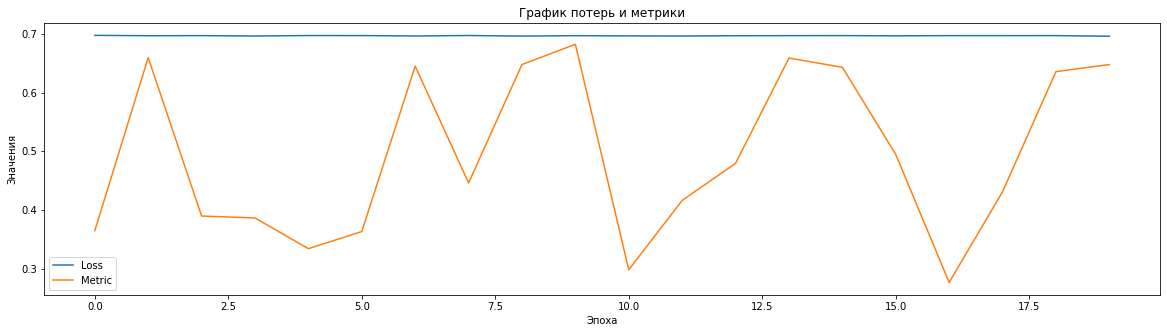

In [47]:
visualising(losses_and_metrics)

Нейронные сети из-за обучения на GPU имеют некоторую случайность. Из-за этого результаты каждый раз разнятся, поэтому сохраним модель.
Так-же у нас подаются разные batch-и.

In [48]:
net.eval()
y_pred = net(X_eval_net).flatten().detach().numpy()
roc_auc = roc_auc_score(y_eval, y_pred)

y_pred = (y_pred >= 0.496).astype(int)

recall = recall_score(y_eval, y_pred)
precision = precision_score(y_eval, y_pred)
accuracy = accuracy_score(y_eval, y_pred)

print('roc_auc', roc_auc)
print('recall', recall)
print('precision', precision)
print('accuracy', accuracy)

roc_auc 0.6477631133863596
recall 0.0
precision 0.0
accuracy 0.49642857142857144


In [49]:
results['torch'] = [roc_auc, recall, precision, accuracy]

<br>

#### Выводы

In [50]:
pd.DataFrame(results, index = ['roc_auc', 'recall', 'precision', 'accuracy']).T

,roc_auc,recall,precision,accuracy
lightgbm,0.787719,0.803783,0.636109,0.669643
catboost,0.785126,0.785264,0.635929,0.665476
torch,0.647763,0.000000,0.000000,0.496429


**CatBoost** обладает наилучшей полнотой и также демонстрирует приемлемое качество по ROC AUC, что делает его подходящим для нашей задачи. Torch  в рамках практикума не целесобразен, невозможности сохранения результата.

<br>

#### Проверка лучшей модели в работе.

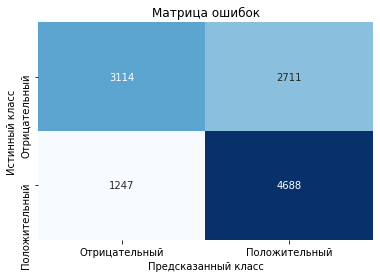


roc_auc 0.7774176612876983
recall 0.7898904802021904
precision 0.6335991350182457
accuracy 0.6634353741496599


In [51]:
y_pred = catboost.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred)
y_pred = (y_pred >= 0.375).astype(int)

recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Отрицательный', 'Положительный'],
            yticklabels=['Отрицательный', 'Положительный'])

plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.title('Матрица ошибок')
plt.show()

print()
print('roc_auc', roc_auc)
print('recall', recall)
print('precision', precision)
print('accuracy', accuracy)

**Модель демонстрирует обнадеживающие результаты** с высокой способностью разделять классы и правильно определять аварии с виной водителя. Однако, **есть потенциал для улучшения**, особенно в области точности. Низкая точность может привести к возникновению большего числа ложноположительных результатов, что может быть нежелательным в контексте задачи определения виновности в авариях.

<br>

## Проведите анализ важности факторов ДТП

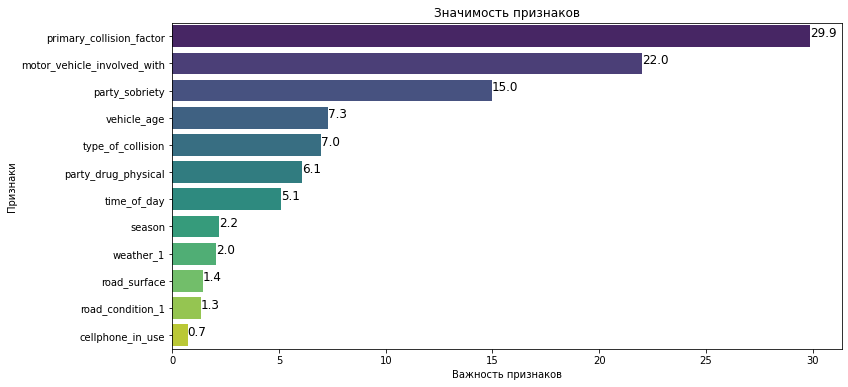

In [52]:
importance = catboost.get_feature_importance(prettified=True)

plt.figure(figsize=(12, 6))
sns.barplot(data = importance, y='Feature Id', x='Importances', palette='viridis')

# Добавление значений важности на график
for i, v in enumerate(importance['Importances'].tolist()):
    plt.text(v + 0.005, i, f'{v:.1f}', color='black', fontsize=12)

plt.xlabel('Важность признаков')
plt.ylabel('Признаки')
plt.title('Значимость признаков')
plt.show()

<br>

**PRIMARY_COLL_FACTOR (Основной фактор аварии):** имеет наибольшую важность среди всех признаков.

**PARTY_SOBRIETY (Трезвость участника):** имеет существенную важность. 

<br>

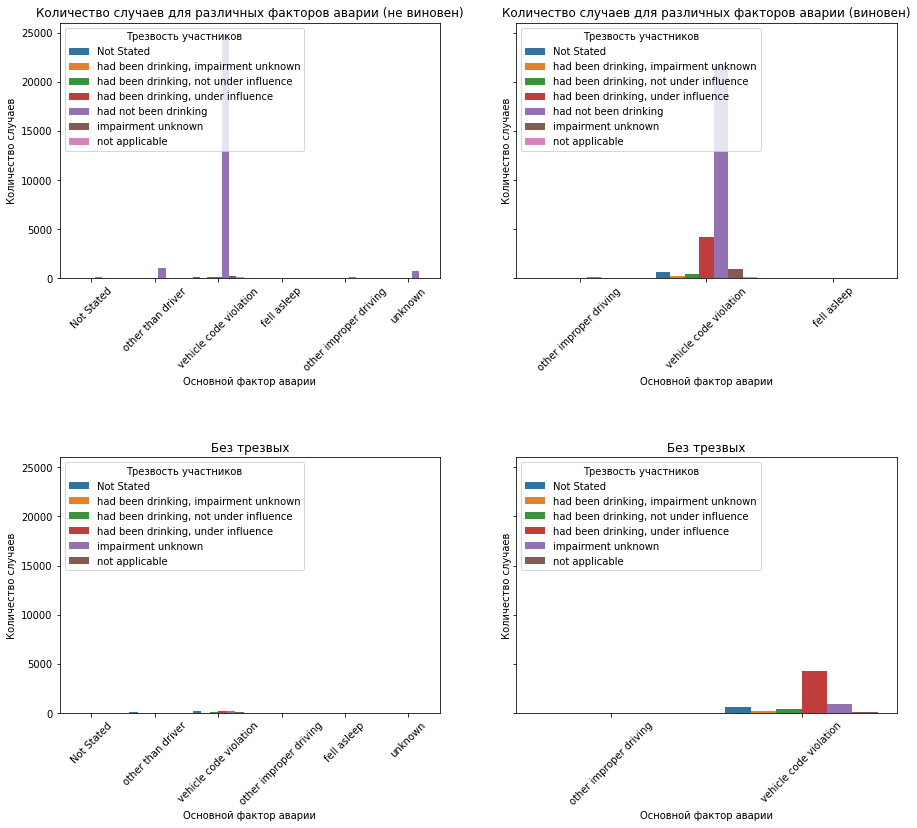

In [53]:
grouped = df.groupby(['primary_collision_factor','party_sobriety', 'at_fault'])['cellphone_in_use'].count().to_frame().reset_index()
grouped.rename(columns={'cellphone_in_use': 'count'}, inplace=True)

fig, axes = plt.subplots(2, 2, figsize=(15, 12.7), sharex=False, sharey=True)

# Первый barplot для at_fault=1
sns.barplot(data=grouped[grouped['at_fault'] == 0].sort_values('party_sobriety'), x='primary_collision_factor', y='count', hue='party_sobriety', ax=axes[0][0])
axes[0][0].set_xlabel('Основной фактор аварии')
axes[0][0].set_ylabel('Количество случаев')
axes[0][0].set_title('Количество случаев для различных факторов аварии (не виновен)')
axes[0][0].legend(title='Трезвость участников', loc='upper left')
axes[0][0].tick_params(axis='x', rotation=45)

# Второй barplot для at_fault=0
sns.barplot(data=grouped[grouped['at_fault'] == 1].sort_values('party_sobriety'), x='primary_collision_factor', y='count', hue='party_sobriety', ax=axes[0][1])
axes[0][1].set_xlabel('Основной фактор аварии')
axes[0][1].set_ylabel('Количество случаев')
axes[0][1].set_title('Количество случаев для различных факторов аварии (виновен)')
axes[0][1].legend(title='Трезвость участников', loc='upper left')
axes[0][1].tick_params(axis='x', rotation=45)


sns.barplot(data=grouped[(grouped['at_fault'] == 0) & (grouped['party_sobriety'] != 'had not been drinking')].sort_values('party_sobriety'),
                                         x='primary_collision_factor', y='count', hue='party_sobriety', ax=axes[1][0])
axes[1][0].set_xlabel('Основной фактор аварии')
axes[1][0].set_ylabel('Количество случаев')
axes[1][0].set_title('Без трезвых')
axes[1][0].legend(title='Трезвость участников', loc='upper left')
axes[1][0].tick_params(axis='x', rotation=45)

# Второй barplot для at_fault=0
sns.barplot(data=grouped[(grouped['at_fault'] == 1) & (grouped['party_sobriety'] != 'had not been drinking')].sort_values('party_sobriety'), 
                                         x='primary_collision_factor', y='count', hue='party_sobriety', ax=axes[1][1])
axes[1][1].set_xlabel('Основной фактор аварии')
axes[1][1].set_ylabel('Количество случаев')
axes[1][1].set_title('Без трезвых')
axes[1][1].legend(title='Трезвость участников', loc='upper left')
axes[1][1].tick_params(axis='x', rotation=45)

plt.subplots_adjust(hspace=0.7)
plt.show()

**Вывод**: При анализе двух факторов: "primary_collision_factor" и "party_sobriety", можно определить виновных и невиновных участников аварий. Наблюдается, что наибольшее количество невиновных (больше на 20% по сравнению с числом виновных) - это не пьяные водители, попавшие в аварию из-за "Нарушения правил ПДД". С другой стороны, другие категории трезвости водителей чаще всего являются виновными, и только малая часть из них оказывается невиновной.

**Предложения**:
1. **Оборудовать автомобиль анализатором алкогольного опьянения**. Для повышения безопасности на дорогах следует рассмотреть возможность обязательного наличия анализаторов алкогольного опьянения в автомобилях. При сажании за руль такого транспортного средства, проведение теста на алкогольное опьянение должно стать необходимым требованием. Для обеспечения аутентичности теста, можно добавить камеру, направленную на водительское место, которая фиксирует, что тест совершается самим водителем.
2. **Интегрировать в приложения каршеринга тест за знание правил ПДД**. Для повышения безопасности и снижения аварийности среди пользователей каршеринговых услуг, рекомендуется внедрить систему, требующую успешного прохождения теста на знание правил ПДД. Прохождение такого теста должно стать обязательным условием для допуска пользователя к управлению автомобилем. Для подтверждения, что тест проходит именно зарегистрированный владелец аккаунта, в настоящее время может быть непросто. Офлайн тест с документом - один из способов решения этой проблемы, но, конечно, это может снизить приток пользователей в сервис. Несмотря на это, такой подход значительно увеличит безопасность на дорогах.

## Выводы

**Модель CatBoost** продемонстрировала удовлетворительные результаты с отличной способностью разделять классы и точно определять виновных в авариях. Однако, **всегда есть возможность для дальнейшего совершенствования**. Основной аспект, на который стоит обратить внимание, это дополнительное **повышение точности модели**. 

Я уверен, что с**оздание адекватной системы оценки риска при выдаче автомобилей возможно**, однако существуют определенные **трудности**, которые необходимо преодолеть. Одной из главных сложностей является **точное определение состояния водителя**, включая его алкогольное и другое влияние. Это **действительно возможно, но требует огромных усилий** и использования передовых технологий. Кроме того, важно уделить внимание **соблюдению законодательства и нормативов в области защиты персональных данных и приватности водителей**. Это касается как хранения и обработки личной информации, так и использования камер и датчиков для сбора данных о водителях.

**Для совершенствования модели, необходимо добавить данные о реальном водительском опыте, истории нарушений правил дорожного движения и количестве аварий**. Однако, при сборе такой информации возникают определенные **сложности** и ограничения, которые могут затруднить процесс и сделать его менее точным. Например **водительский стаж, указанный в водительских правах, не всегда является абсолютно точным определением стажа вождения**. 